В данном проекте используется обученная нейросеть(классификатор), определяющая в какой части изначального изображения какой объект находится, используя метод скользящего окна.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.python import keras
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import pandas
import cv2

/home/entilza/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/entilza/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/entilza/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/entilza/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

In [2]:
classes = ['круассан','полки','пончик','завиток']

In [3]:
model = keras.models.load_model('modelWork.hdf5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0

In [5]:
img_width, img_height = (100,100)

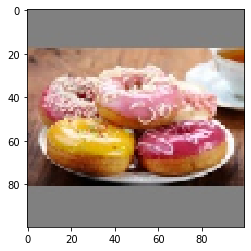

Номер класса: 2
Название класса: пончик


In [6]:
#ПРОВЕРКА НА ОДНОЙ КАРТИНКЕ
imgM = image.load_img('./dataset/test/ponchik.188.jpg', target_size=(100, 100))
#imgM = cv2.imread('./pictest/testponchik.jpg')
#imgM = cv2.cvtColor(imgM, cv2.COLOR_BGR2RGB)
plt.imshow(imgM)
plt.show()

x = image.img_to_array(imgM)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

In [7]:
imgForParts = cv2.imread('forParts.jpg')
imgForParts = cv2.cvtColor(imgForParts, cv2.COLOR_BGR2RGB)
#imgM = image.load_img('')
print(imgForParts.shape)

(300, 450, 3)


In [8]:
# создаем списки с контрольными точками
listX = [0]
dw = 100
w=0
while w < imgForParts.shape[1]:
    w+=dw
    if w>imgForParts.shape[1]:
        w=imgForParts.shape[1]
    listX.append(w)
print(listX)

listY = [0]
dh = 100
h=0
while h < imgForParts.shape[0]:
    h+=dh
    if h>imgForParts.shape[0]:
        h=imgForParts.shape[0]
    listY.append(h)
print(listY) 

[0, 100, 200, 300, 400, 450]
[0, 100, 200, 300]


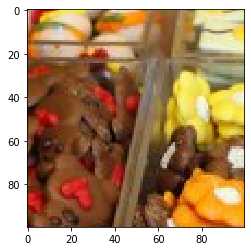

Номер класса: 1
Название класса: полки


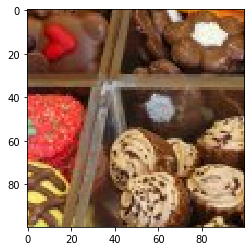

Номер класса: 2
Название класса: пончик


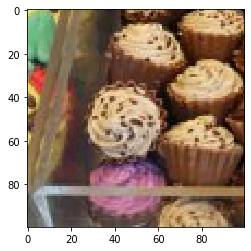

Номер класса: 2
Название класса: пончик


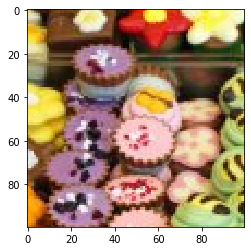

Номер класса: 2
Название класса: пончик


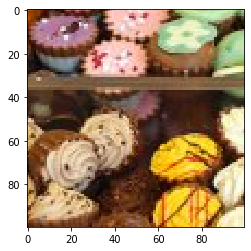

Номер класса: 2
Название класса: пончик


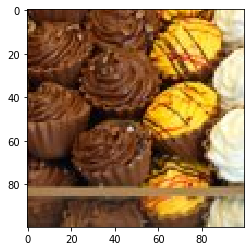

Номер класса: 3
Название класса: завиток


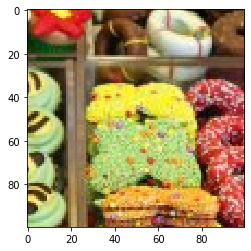

Номер класса: 2
Название класса: пончик


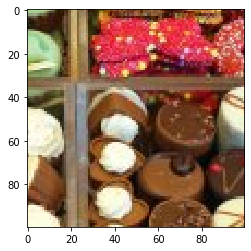

Номер класса: 2
Название класса: пончик


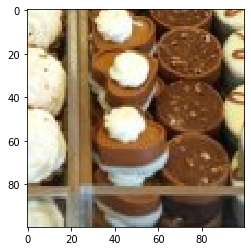

Номер класса: 2
Название класса: пончик


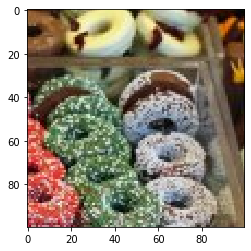

Номер класса: 2
Название класса: пончик


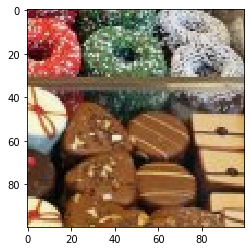

Номер класса: 2
Название класса: пончик


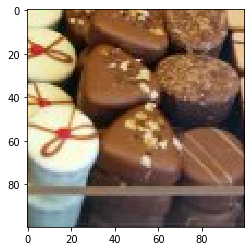

Номер класса: 2
Название класса: пончик


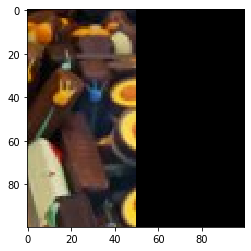

Номер класса: 1
Название класса: полки


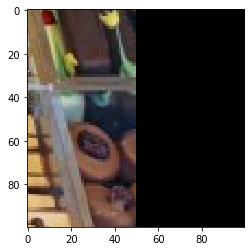

Номер класса: 1
Название класса: полки


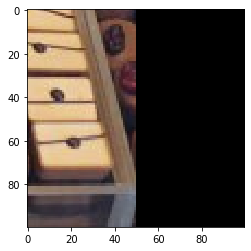

Номер класса: 1
Название класса: полки


In [9]:
maskShape = (img_height, img_width, 3)
if len(imgForParts)==2:
    maskShape = (img_height, img_width)

# целую картинку разбиваем по части по заданным координатам и проверяем
for x in range(len(listX)):
    for y in range(len(listY)):
        if listY[y]==listY[-1] or listX[x]==listX[-1]:
            break
        # создаем маску, на которую накладывается обрабатываемая часть изображения
        mask = np.zeros(maskShape, dtype = np.uint8)
        dy = listY[y+1]-listY[y]
        dx = listX[x+1]-listX[x]
        mask [:dy,:dx]= imgForParts[listY[y]:listY[y+1], listX[x]:listX[x+1]]
        #mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        plt.imshow(mask)
        plt.show()
        pic = image.img_to_array(mask)
        pic = np.expand_dims(pic, axis=0)
        pic /= 255
        prediction = model.predict(pic)
        prediction = np.argmax(prediction)
        print("Номер класса:", prediction)
        print("Название класса:", classes[prediction])

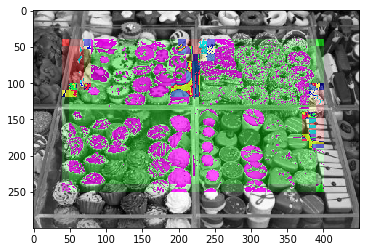

In [13]:
# второая часть кода обрабатывает изображение с заданным шагом 
#и в зависимости от результата prediction раскрашивает эту часть в определенный цвет

imgM = cv2.imread('forParts.jpg')
imgM = cv2.cvtColor(imgM, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(imgM, cv2.COLOR_RGB2GRAY)
imgGray = cv2.cvtColor(imgGray, cv2.COLOR_GRAY2RGB)

# шаг, через который будет обрабатываться изображение
step = 10
for y in range(int(img_height/2), int(imgM.shape[0]-img_height/2),step):
    for x in range(int(img_width/2), int(imgM.shape[1]-img_width/2),step):
        xS = int(x - img_width/2)
        yS = int(y - img_height/2)
        xSn = int(xS+img_width)
        ySn = int(yS+img_height)
        imgSmall = imgM[yS:ySn, xS:xSn]
        imgSmall = image.img_to_array(imgSmall)
        imgSmall = np.expand_dims(imgSmall, axis=0)
        #imgSmall /= 255
        prediction = model.predict(imgSmall)

        # из библиотеки numpy используем функцию argmax для отображения максимального значения
        prediction = np.argmax(prediction)
        if prediction == 0:#cruassan
            c = imgGray[(y-step) : (y+step), (x-step) : (x+step),0]+150
            c[c > 255] = 255
            imgGray[(y-step) : (y+step), (x-step) : (x+step),0] = c
        if prediction == 2:#ponchik
            c = imgGray[(y-step) : (y+step), (x-step) : (x+step),1]+150
            c[c > 255] = 255
            imgGray[(y-step) : (y+step), (x-step) : (x+step),1] = c
        if prediction == 3:#zavitok
            c = imgGray[(y-step) : (y+step), (x-step) : (x+step),2]+150
            c[c > 255] = 255
            imgGray[(y-step) : (y+step), (x-step) : (x+step),2] = c


plt.imshow(imgGray)
plt.show()